In [209]:
import pandas as pd
import datetime
import matplotlib as plt
import us

In [210]:
%matplotlib inline

In [211]:
data = pd.read_csv("consumer_complaints.csv", low_memory=False)
data.head(3)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN


In [212]:
data.index = pd.to_datetime(data.pop('Date received'))

In [213]:
data.head(3)

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Date received,,,,,,,,,,,,,
2015-05-22,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
2015-05-22,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2015-05-22,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN


In [214]:
data = data[['Complaint ID', 'Product','Sub-product','State','ZIP code','Company','Company response']]

In [215]:
data = data['04/30/2015':]

## Number of Complaints by Month

In [216]:
comp_by_month = data['Complaint ID'].resample('M', how='count')

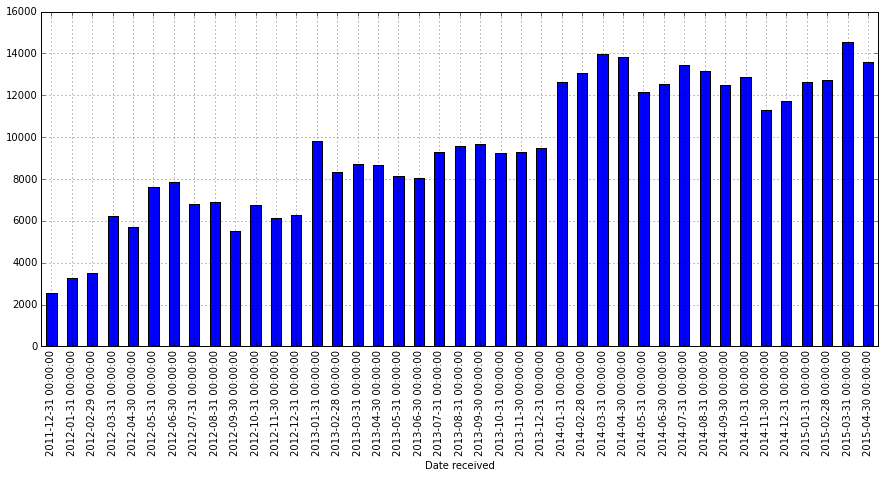

In [217]:
comp_by_month.plot(kind="bar", figsize=(15, 6))

## Number of Complaints by Product

In [218]:
products = data['Product'].value_counts()
products

Mortgage                   145199
Debt collection             64217
Credit reporting            55956
Credit card                 49125
Bank account or service     45330
Consumer loan               12943
Student loan                11725
Payday loan                  2499
Money transfers              2186
Prepaid card                  669
Other financial service       202
dtype: int64

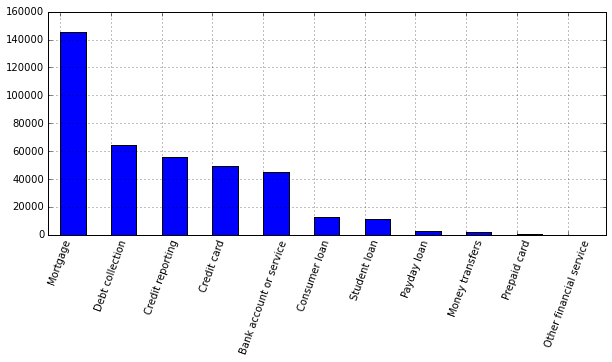

In [219]:
products.plot(kind="bar", figsize=(10, 4), rot=70, position=0)

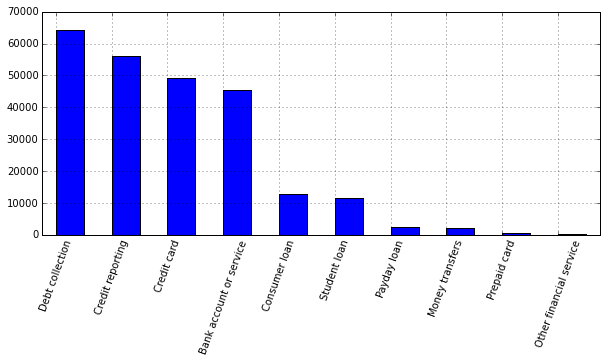

In [220]:
products[1:].plot(kind="bar", figsize=(10, 4), rot=70, position=0)

## Complaints by Company

In [221]:
by_company = data['Company'].value_counts()[:10]
by_company

Bank of America        46553
Wells Fargo            32700
JPMorgan Chase         25880
Experian               19777
Citibank               19370
Equifax                19048
Ocwen                  16702
TransUnion             14961
Capital One            11965
Nationstar Mortgage     9565
dtype: int64

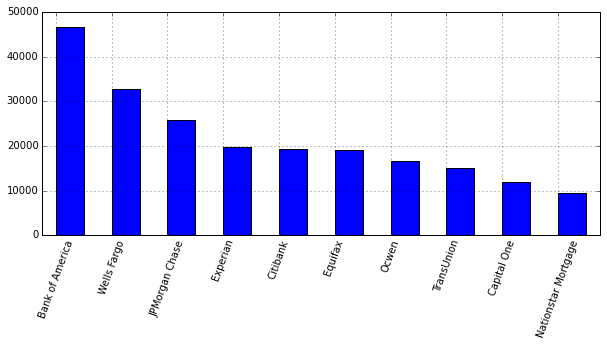

In [222]:
by_company.plot(kind="bar", figsize=(10, 4), rot=70, position=0)

## By Company Response

In [223]:
by_response = data['Company response'].value_counts()
by_response

Closed with explanation            275977
Closed with non-monetary relief     49904
Closed with monetary relief         27928
Closed without relief               17909
Closed                               9499
Closed with relief                   5305
Untimely response                    1828
In progress                          1701
dtype: int64

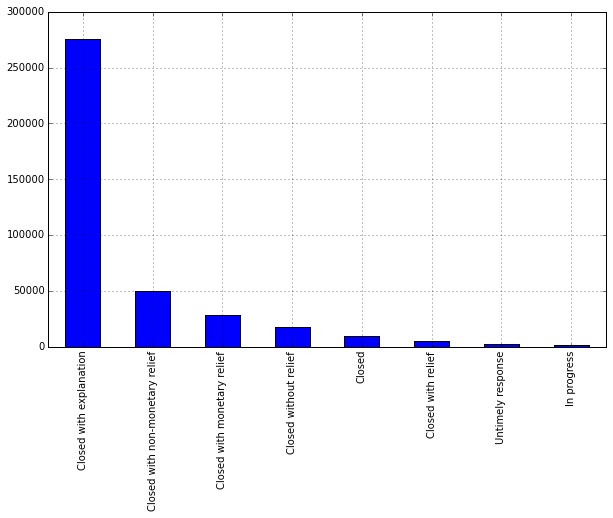

In [224]:
by_response.plot(kind="bar", figsize=(10, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11b2c2198>], dtype=object)

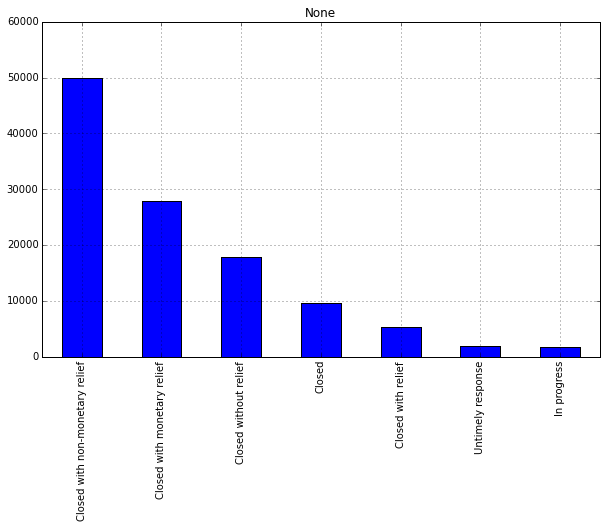

In [225]:
by_response[1:].plot(kind='bar', figsize=(10,6), subplots=True, ylim=(0,60000))

## Mean # of Complaints by Day of Week

In [226]:
data["day_of_week"] = data.index.to_series().map(lambda d: d.weekday())

In [227]:
by_week = data.groupby('day_of_week').apply(lambda x: x['day_of_week'].count()/data['Company'].count())

In [228]:
dow = 'Su', 'Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa'

In [229]:
by_week.index = dow

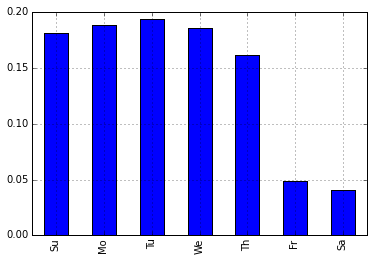

In [230]:
by_week.plot(kind='bar')

In [231]:
popu = pd.read_csv("SCPRC-EST2014-18+POP-RES.csv")
popu = popu[['STATE','NAME','POPEST18PLUS2014']]
popu.index = popu.pop('STATE')
popu

,NAME,POPEST18PLUS2014
STATE,,
0,United States,245273438
1,Alabama,3741806
2,Alaska,550189
4,Arizona,5109792
5,Arkansas,2259350
6,California,29649348
8,Colorado,4109494
9,Connecticut,2821247
10,Delaware,731367


In [238]:
us_dict = us.states.mapping('abbr', 'name')
popu.apply(lambda x: val for val in us_dict.keys() if val == x['NAME'])

TypeError: ("'generator' object is not callable", 'occurred at index NAME')